<a href="https://colab.research.google.com/github/ohjerez/zoom/blob/main/df_resultado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Base de datos

In [ ]:
df = pd.read_csv("/casas.csv")
df.head()

,m2,Ano_construccion,n_habitaciones,n_ventanas,n_banos,Precio
0,87.912100,1947,3,6,2,299538.5044
1,85.315972,2022,3,6,1,301890.5662
2,78.376723,1961,2,6,1,268969.3187
3,112.140336,2011,4,16,1,394649.8780
4,107.020064,1968,3,3,1,368577.0992


In [ ]:
#Exploración de los datos

In [ ]:
df.describe()

,m2,Ano_construccion,n_habitaciones,n_ventanas,n_banos,Precio
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,96.952059,1992.651007,3.174497,9.248322,1.697987,339349.852152
std,21.221602,86.165768,0.723463,13.114313,0.859798,71441.876826
min,-22.301393,1887.000000,1.000000,2.000000,1.000000,100901.666500
25%,84.709784,1966.000000,3.000000,4.000000,1.000000,292308.157700
50%,95.919298,1987.000000,3.000000,8.000000,1.000000,334774.486700
75%,111.415418,2010.000000,4.000000,12.000000,2.000000,388340.087400
max,144.855824,2987.000000,5.000000,160.000000,4.000000,605233.582600


In [ ]:
# en columna n_ventanas = 160; en columna m2 el min de -22.30; en columna Ano_construccion max = 2987

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


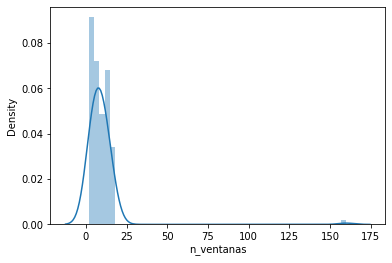

In [ ]:
sns.distplot(df["n_ventanas"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


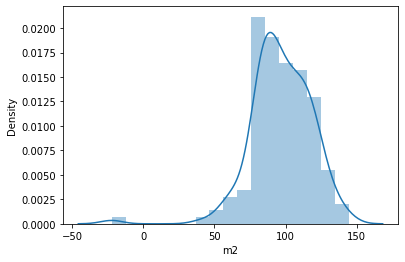

In [ ]:
sns.distplot(df["m2"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


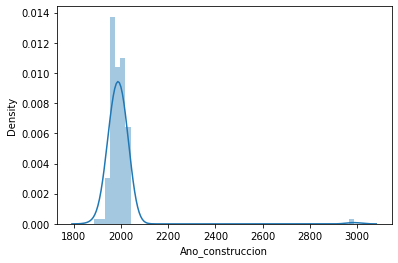

In [ ]:
sns.distplot(df["Ano_construccion"])
plt.show()

In [ ]:
# Buscar si en la data existen datos no definidos

In [ ]:
print(df.isna().sum(axis=0))

m2                  0
Ano_construccion    0
n_habitaciones      0
n_ventanas          0
n_banos             0
Precio              0
dtype: int64


In [ ]:
# definiciones

In [ ]:
def displot(df, columna):
  sns.distplot(df[columna])
  media  = df[columna].mean()
  std  = df[columna].std()
  plt.axvline(media, color='blue', linestyle='dashed', linewidth=1)
  plt.axvline(media+3*std, color='red', linestyle='dashed', linewidth=1)
  plt.axvline(media-3*std, color='red', linestyle='dashed', linewidth=1)
  return plt.show()

In [ ]:
def outliers_std(df, columna, n):
    media  = df[columna].mean() 
    std  = df[columna].std()   
    return df[(df[columna]>media+n*std) | (df[columna]<media-n*std)]

In [ ]:
# columna ventanas - valores inesperados (160)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


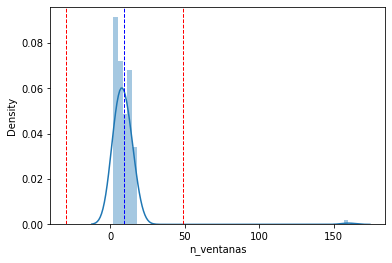

In [ ]:
outliers_std(df, "n_ventanas", 3)
displot(df, "n_ventanas")

In [ ]:
df[df["n_ventanas"]>50]

,m2,Ano_construccion,n_habitaciones,n_ventanas,n_banos,Precio
123,118.841535,2008,4,160,2,417609.1528


In [ ]:
# las ventanas puede ser un error de digitación al parecer son 16

In [ ]:
# columna m2 - valores inesperados (-22,30)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


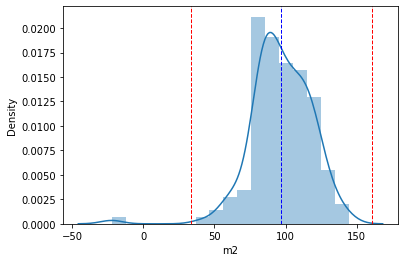

In [ ]:
outliers_std(df, "m2", 3)
displot(df, "m2")

In [ ]:
df[df["m2"]<0]

,m2,Ano_construccion,n_habitaciones,n_ventanas,n_banos,Precio
78,-22.301393,2008,3,6,3,335869.0143


In [ ]:
# el error es en el area de la construcción, es una variable sensible, se recomienda descartar ese dato.

In [ ]:
# columna Año_construccion - valores inesperados (2987)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


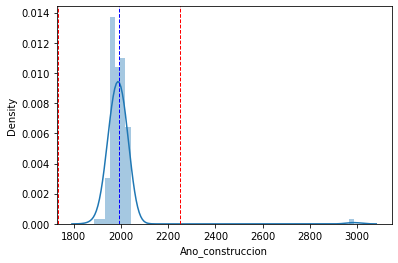

In [ ]:
outliers_std(df, "Ano_construccion", 3)
displot(df, "Ano_construccion")

In [ ]:
df[df["Ano_construccion"]>2400]

,m2,Ano_construccion,n_habitaciones,n_ventanas,n_banos,Precio
144,81.043402,2987,3,3,1,286772.0776


In [ ]:
# Se puede pensar que es un error en digitación el año correcto es 1987...

In [ ]:
# Para acercarnos a un valor de construcción, se suele utilizar la variable de costo por m2, 
# se crea una nueva columna precio_m2 que representa el valor por $/m2 de la construccion

In [ ]:
df = df.assign(precio_m2 = df["Precio"] / df["m2"])

In [ ]:
print (df)

             m2  Ano_construccion  n_habitaciones  n_ventanas  n_banos  \
0     87.912100              1947               3           6        2   
1     85.315972              2022               3           6        1   
2     78.376723              1961               2           6        1   
3    112.140336              2011               4          16        1   
4    107.020064              1968               3           3        1   
..          ...               ...             ...         ...      ...   
144   81.043402              2987               3           3        1   
145  112.618247              1977               4           4        3   
146   83.472145              1967               3           3        1   
147  119.494330              1964               4          12        2   
148  102.214961              1962               3           3        1   

          Precio    precio_m2  
0    299538.5044  3407.250000  
1    301890.5662  3538.500001  
2    268969.318

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


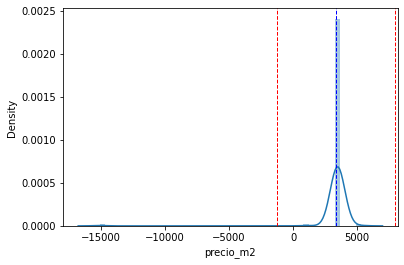

In [ ]:
outliers_std(df, "precio_m2", 3)
displot(df, "precio_m2")

In [ ]:
outliers_std(df, "precio_m2", 3)

,m2,Ano_construccion,n_habitaciones,n_ventanas,n_banos,Precio,precio_m2
78,-22.301393,2008,3,6,3,335869.0143,-15060.450247


In [ ]:
# se elimina esta fila por ser m2 una variable de importancia y muy sensible en el calculo del valor por metro cuadrado

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


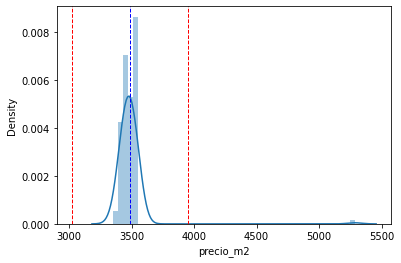

In [ ]:
df = df[df["precio_m2"]>=1000]
displot(df, "precio_m2")

In [ ]:
outliers_std(df, "precio_m2", 3)

,m2,Ano_construccion,n_habitaciones,n_ventanas,n_banos,Precio,precio_m2
64,114.521289,2022,4,16,1,605233.5826,5284.900177


In [ ]:
# se hace una nueva iteración encontrando que la cola a la derecha se pude eliminar para tener un valor mas centrado

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


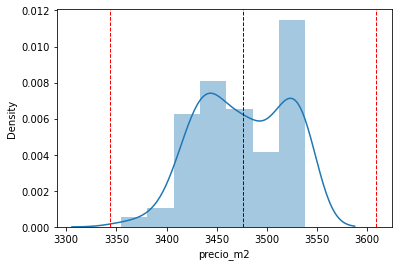

In [ ]:
df = df[df["precio_m2"]<=4000]
displot(df, "precio_m2")

In [ ]:
# el promedio se puede esperar alrededeor de $3.475 por metro cuadrado de construcción.

In [ ]:
# Analisis por quintiles

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


3440.937499870872 3517.0624998077997 76.12499993692745


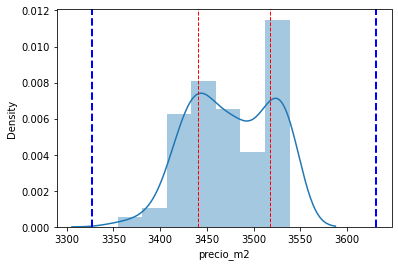

In [ ]:
sns.distplot(df["precio_m2"])

q1 = df["precio_m2"].quantile(0.25)
q3 = df["precio_m2"].quantile(0.75)
iqr = q3-q1
print(q1, q3, iqr)
plt.axvline(q1, color="red",linestyle='dashed', linewidth=1)
plt.axvline(q3, color="red",linestyle='dashed', linewidth=1)
plt.axvline(q1-iqr*1.5, color="blue",linestyle='dashed', linewidth=2)
plt.axvline(q3+iqr*1.5, color="blue",linestyle='dashed', linewidth=2)
plt.show()

In [ ]:
def outliers_iqr(df, columna, n):
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    iqr = q3-q1
    return df[(df[columna]>q3+iqr*n) | (df[columna]<q1-iqr*n)]

In [ ]:
outliers_iqr(df,"precio_m2", 2)

,m2,Ano_construccion,n_habitaciones,n_ventanas,n_banos,Precio,precio_m2


In [ ]:
# el promedio utilizando los quintiles es de 3.479 que no es muy diferente a la media 3.475